In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def pop_generator(pop_size, freq):
  pop = np.zeros((pop_size, 2), dtype = int)
  product = pop_size * freq
  int_pro = int(product)
  count = 0
  for row in range(int_pro): # frequency currently set to change the [1, 1]
      pop[row] = [1, 1]
      count += 1
  return pop

In [3]:
def first_counter(gen_pop):
  count_list = []
  h0 = 0
  h1 = 0
  het = 0
  for i in range(len(gen_pop[0])):
    if gen_pop[0][i] == [0, 0]:
      h0 += 1
    elif gen_pop[0][i] == [1, 1]:
      h1 += 1
    else:
      het += 1
  count_list.append(h0)
  count_list.append(h1)
  count_list.append(het)
  return count_list

In [4]:
def freq_list(lis, pop_size):
  lis_count = []
  for row in range(len(lis)):
    freq = lis[row] / pop_size
    lis_count.append(freq)
  return lis_count


In [5]:
def mendel(pop_size, gens, freq):
  rng = np.random.default_rng()
  ini_pop = pop_generator(pop_size, freq)
  hom_0 = []
  hom_1 = []
  hete = []

  gen_pop = [] # Has all generations
  gen_pop.append(np.array(ini_pop).tolist()) #adds the intial population
  count_list = first_counter(gen_pop) # This is to count the initial population
  hom_0.append(count_list[0])
  hom_1.append(count_list[1])
  hete.append(count_list[2])
  for i in range(gens):
    newGen = [] # Separates by generation
    hom0 = 0
    hom1 = 0
    het = 0
    for k in range(pop_size):
        parents = rng.choice(gen_pop[i], 2, replace = False) #Chooses two parents
        allele_1 = rng.choice(parents[0], 1)
        allele_2 = rng.choice(parents[1], 1)
        child = []
        child.append(allele_1[0])
        child.append(allele_2[0])
        if child == [0, 0]:
          hom0+=1
        elif child == [1, 1]:
          hom1+=1
        else:
          het+=1
        newGen.append(child) #adds child to generation
    gen_pop.append(newGen) # adds generation
    hom_0.append(hom0)
    hom_1.append(hom1)
    hete.append(het)

  h0 = freq_list(hom_0, pop_size)
  h1 = freq_list(hom_1, pop_size)
  ht = freq_list(hete, pop_size)

  data = {"Generation" : np.arange(0, gens+1), "hom0" : h0 , "hom1": h1, "het" : ht}
  data = pd.DataFrame(data)
  #print(pd.DataFrame(gen_pop))     #Use this to see the whole gen table
  return data

df = mendel(3000, 50, .8)


<Axes: title={'center': 'Hardy Weinberg:Orange = Hom1, Green = Het1, Blue = Hom0 '}, xlabel='Generation', ylabel='hom0'>

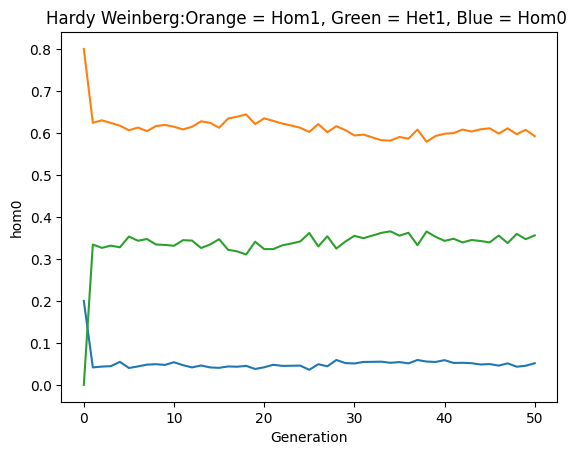

In [10]:
sns.lineplot(x = df["Generation"], y = df["hom0"]).set(title="Hardy Weinberg:Orange = Hom1, Green = Het1, Blue = Hom0 ")
sns.lineplot(x = df["Generation"], y = df["hom1"])
sns.lineplot(x = df["Generation"], y = df["het"])